<a href="https://colab.research.google.com/github/DAVID5263/Analise-De-Dados/blob/Python/Previs%C3%A3o_de_De_Risco_de_Doen%C3%A7as_vasculares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import decimal
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
base = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CVD_cleaned.csv')
base.columns

In [ ]:
base.info()

0       No
1      Yes
2      Yes
3      Yes
4       No
      ... 
195     No
196    Yes
197     No
198    Yes
199    Yes
Name: Diabetes, Length: 200, dtype: object

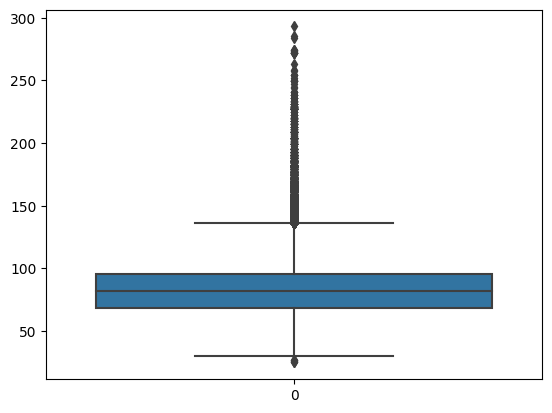

In [5]:
sns.boxplot(base['Weight_(kg)'])
base['Diabetes'].head(200)

In [6]:
n_alcool = []
s_alcool = []
for i in base['Depression']:
    if i == 'Yes':
      s_alcool.append(i)
    else:
      n_alcool.append(i)

In [7]:
print(len(n_alcool))
print(len(s_alcool))

246953
61901


In [8]:
sem_cancer = (base['Other_Cancer'] == 'No')
sem_cancer.value_counts()
com_cancer = (base['Other_Cancer'] == 'Yes')
com_cancer.value_counts()


False    278976
True      29878
Name: Other_Cancer, dtype: int64

In [24]:
abaixo_do_Peso = []
peso_normal = []
acima_do_Peso = []
obsedidade1 = []
obsidade2 = []
obsidade3 = []
for i in base['BMI']:
  if i < 18.5:
    abaixo_do_Peso.append(i)
  elif i >=18.5 and i <= 24.9:
    peso_normal.append(i)
  elif i >= 25 and i <=29.9:
    acima_do_Peso.append(i)
  elif i > 29.9 and i <= 34.9:
    obsedidade1.append(i)
  elif i >= 35 and i <=40:
    obsidade2.append(i)
  elif i > 40:
    obsidade3.append(i)

In [10]:
soma_abp = len(abaixo_do_Peso)
print(f'Temos um total de {soma_abp} que estão Abaixo do Peso.')
soma_pesoNormal = len(peso_normal)
print(f'Temos um Total de {soma_pesoNormal} que estão com o Peso Normal.')
soma_acimaDoPeso = len(acima_do_Peso)
print(f'Temos um Total de {soma_acimaDoPeso} que estão Acima Do Peso.')
soma_obsidade1 = len(obsedidade1)
print(f'Temos um Total de {soma_obsidade1} que estão com a Obsidade de Grau 1.')
soma_obsidade2 = len(obsidade2)
print(f'Temos um Total de {soma_obsidade2} que estão com a Obsidade de Grau 2.')
soma_obsidade3 = len(obsidade3)
print(f'Temos um Total de {soma_obsidade3} que estão com a Obsidade de Grau 3.')


Temos um total de 4537 que estão Abaixo do Peso.
Temos um Total de 87713 que estão com o Peso Normal.
Temos um Total de 107824 que estão Acima Do Peso.
Temos um Total de 61974 que estão com a Obsidade de Grau 1.
Temos um Total de 25957 que estão com a Obsidade de Grau 2.
Temos um Total de 17660 que estão com a Obsidade de Grau 3.


In [11]:
total_imc = len(base['BMI'])
imc1_abaixo_peso = (soma_abp/total_imc)*100
imc2_peso_normal = (soma_pesoNormal/total_imc)*100
imc3 = (soma_acimaDoPeso/total_imc)
imc4_obsidade1= (soma_obsidade1/total_imc)*100
imc5_obsidade2 = (soma_obsidade2/total_imc)*100
imc6_obsidade3 = (soma_obsidade3/total_imc)*100


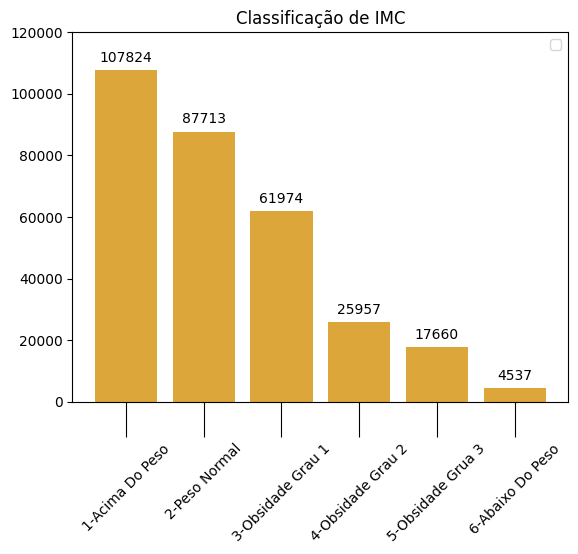

In [12]:
from matplotlib import axis
x = ['1-Acima Do Peso','2-Peso Normal','3-Obsidade Grau 1','4-Obsidade Grau 2','5-Obsidade Grua 3','6-Abaixo Do Peso']
y = [soma_acimaDoPeso,soma_pesoNormal,soma_obsidade1,soma_obsidade2,soma_obsidade3,soma_abp]
fy = sorted(y,reverse=True)

# plot
fig, ax = plt.subplots()

plt.bar(sorted(x),fy, color='#DDA63A')
plt.title("Classificação de IMC")
for i in range(0,6):
  plt.annotate((fy[i]),(i,fy[i]),
  ha="center",
  xytext=(0,6),
  textcoords="offset points",
  )
ax.legend()
ax.set(ylim=(0,120000))
ax.tick_params('x', labelrotation=45,size=25)
plt.show()

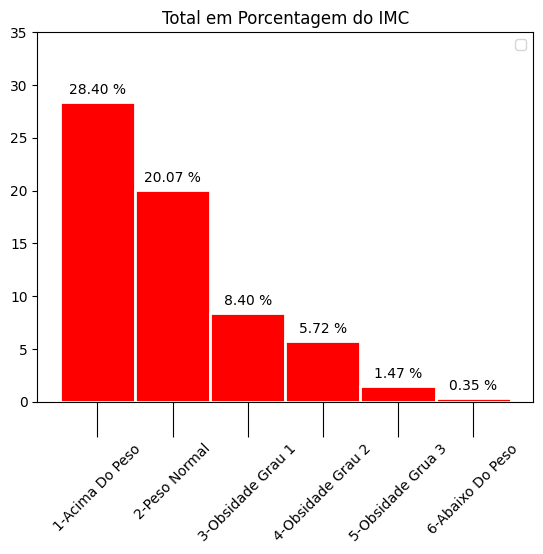

In [13]:
from matplotlib import axis
x = ['1-Acima Do Peso','2-Peso Normal','3-Obsidade Grau 1','4-Obsidade Grau 2','5-Obsidade Grua 3','6-Abaixo Do Peso']
y = [imc1_abaixo_peso,imc2_peso_normal,imc3,imc4_obsidade1,imc5_obsidade2,imc6_obsidade3]
dy = sorted(y,reverse=True)

# plot
fig, ax = plt.subplots()

ax.bar((sorted)(x),dy, width=1, edgecolor="white", linewidth=2.0,color="red",)
plt.title("Total em Porcentagem do IMC")
for i in range(0,6):
  plt.annotate('{:,.2f} %'.format(dy[i]),(i,dy[i]),
  ha="center",
  xytext=(0,6),
  textcoords="offset points",
  )
ax.legend()
ax.set(ylim=(0,35))
ax.tick_params('x', labelrotation=45,size=25)
plt.show()

In [14]:
from pandas.io.formats import info
from pandas.core.arrays.sparse import dtype
c_diabetes = []
s_diabetes = []
for i in base['Diabetes']:
    if i == 'Yes':
      c_diabetes.append(i)
    else:
      s_diabetes.append(i)

total_com_diabetes = (len(c_diabetes))
total_sem_diabetes = (len(s_diabetes))
total_geral_diabetes = (len(base['Diabetes']))
porc_com_diabetes = f'{(total_com_diabetes/total_geral_diabetes)*100:.2f}'
porc_sem_diabetes = f'{(total_sem_diabetes/total_geral_diabetes)*100:.2f}'


print(f'A Porcentagem de Pessoas com Diabetes é de: {porc_com_diabetes}%')
print(f'A Porcentagem de Pessoas que não tem Diabetes é de: {porc_sem_diabetes}%')


A Porcentagem de Pessoas com Diabetes é de: 13.01%
A Porcentagem de Pessoas que não tem Diabetes é de: 86.99%


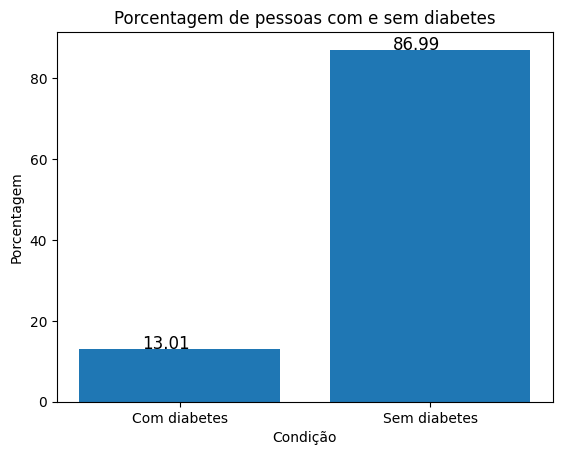

In [15]:
labels = ['Com diabetes', 'Sem diabetes']
valores = [float(porc_com_diabetes),float(porc_sem_diabetes)]

# Criando o gráfico de barras
plt.bar(labels, valores)
plt.annotate(float(porc_com_diabetes),(-0.15,float(porc_com_diabetes)),fontsize=12)
plt.annotate(float(porc_sem_diabetes),(0.85,float(porc_sem_diabetes)),fontsize=12)

# Adicionando título e rótulos dos eixos
plt.title('Porcentagem de pessoas com e sem diabetes')
plt.xlabel('Condição')
plt.ylabel('Porcentagem')

# Exibindo o gráfico
plt.show()

In [32]:
print(' A MÉDIA DO IMC É DE:',base['BMI'].mean())

 A MÉDIA DO IMC É DE: 28.62621053960772


In [17]:
base.corr()

<ipython-input-17-2031aea24313>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  base.corr()


,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
Height_(cm),1.000000,0.472186,-0.027408,0.128835,-0.045911,-0.030148,0.108795
Weight_(kg),0.472186,1.000000,0.859699,-0.032373,-0.090612,-0.075904,0.096351
BMI,-0.027408,0.859699,1.000000,-0.108684,-0.076611,-0.070640,0.048366
Alcohol_Consumption,0.128835,-0.032373,-0.108684,1.000000,-0.012562,0.060053,0.020543
Fruit_Consumption,-0.045911,-0.090612,-0.076611,-0.012562,1.000000,0.270430,-0.060311
Green_Vegetables_Consumption,-0.030148,-0.075904,-0.070640,0.060053,0.270430,1.000000,0.003180
FriedPotato_Consumption,0.108795,0.096351,0.048366,0.020543,-0.060311,0.003180,1.000000


In [18]:
media = np.mean(base['BMI'])
desvio_padrao = np.std(base['BMI'])
coeficiente_variacao = (desvio_padrao / media)* 100
print(f'Média: {media:.2f}')
print(f'Desvio Padrão: {desvio_padrao:.2f}')
print(f'Coeficiente de Variação: {coeficiente_variacao:.2f}%')

Média: 28.63
Desvio Padrão: 6.52
Coeficiente de Variação: 22.78%


In [19]:
assimetria = np.mean((base['BMI'] - media)**3) / (np.std(base['BMI'])**3)
print(f'Assimetria: {assimetria:.2f}')


Assimetria: 1.38


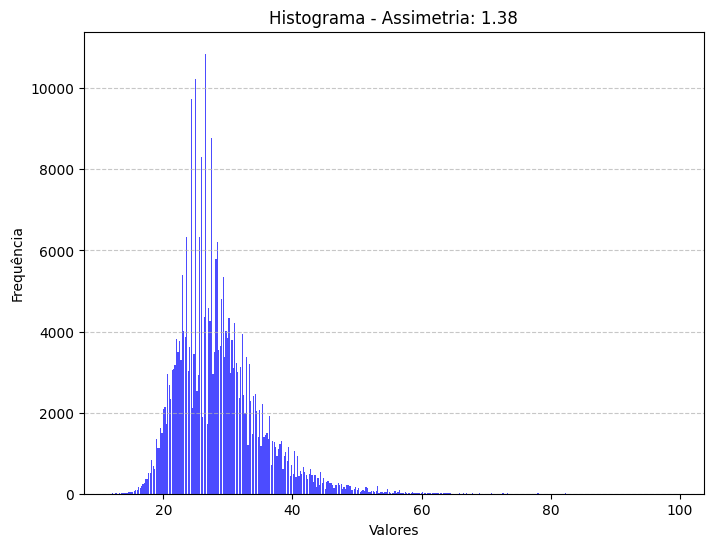

In [20]:
dados = np.array(base['BMI'])
plt.figure(figsize=(8, 6))
plt.hist(dados, bins='auto', color='blue', alpha=0.7, rwidth=0.85)
plt.title(f'Histograma - Assimetria: {assimetria:.2f}')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Correlação entre ImC e Peso: 0.86


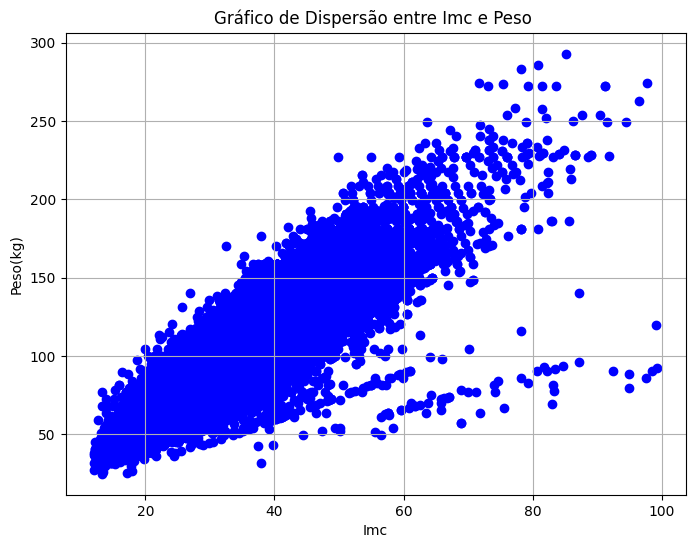

In [23]:
import numpy as np
imc = np.array(base['BMI'])
peso = np.array(base['Weight_(kg)'])
correlation = np.corrcoef(imc,peso)[0, 1]
print(f'Correlação entre ImC e Peso: {correlation:.2f}')

plt.figure(figsize=(8, 6))
plt.scatter(imc,peso, color='blue')
plt.title('Gráfico de Dispersão entre Imc e Peso ')
plt.xlabel('Imc')
plt.ylabel('Peso(kg)')
plt.grid(True)
plt.show()

plt.show()
